Kaggle dataset: https://www.kaggle.com/shivam2503/diamonds

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, silhouette_score
import umap
import warnings

# Display preferences
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns', 100)

In [2]:
# Create dataframe
diamonds = pd.read_csv('../data/diamonds.csv')

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
# Drop Unnamed
diamonds = diamonds.drop(['Unnamed: 0'], axis=1)

In [5]:
# One-hot encoding
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], drop_first=True)], axis=1)

In [6]:
# Remove categorical variables
diamonds = diamonds.drop(['cut', 'color', 'clarity'], axis=1)

In [7]:
diamonds.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


When I started working through the clustering algorithms I was using the entire dataset (53,940 records), but in some cases the algorithms were taking very long to process / complete so I decided to limit independent and dependent variables to the first 20,000 records.

In [16]:
# Independent and dependent variables
X = diamonds.drop(['carat'], axis=1)[:20000]
y = diamonds['carat'][:20000]

In [17]:
# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Clustering 

I'll be comparing K-Means, Hierarchical, DBSCAN and Gaussian Mixture Models clustering algorithms.

In [19]:
# Function for metrics
def score(X_standard, y_actual, y_predictions):
    print('Adjusted Rand Index is {}'.format(adjusted_rand_score(y_actual, y_predictions)))
    print('Silhouette Score is {}'.format(silhouette_score(X_standard, y_predictions, metric='euclidean')))

### K-Means 

In [20]:
clusters = range(2, 21)

for cluster in clusters:
    
    # Number of clusters
    print('Number of clusters: {}'.format(str(cluster)))
    
    # Define KMeans
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)

    # Fit model
    kmeans_cluster.fit(X_std)

    # Predictions
    kmeans_predictions = kmeans_cluster.predict(X_std)
    
    # Metrics
    score(X_std, y, kmeans_predictions)

Number of clusters: 2
Adjusted Rand Index is 0.03403299566755566
Silhouette Score is 0.17352588351473847
Number of clusters: 3
Adjusted Rand Index is 0.030131415717312225
Silhouette Score is 0.09735489481645664
Number of clusters: 4
Adjusted Rand Index is 0.029553120792060825
Silhouette Score is 0.1196427508925917
Number of clusters: 5
Adjusted Rand Index is 0.019718372579591224
Silhouette Score is 0.14373221884607454
Number of clusters: 6
Adjusted Rand Index is 0.027351262315746343
Silhouette Score is 0.13931476208066584
Number of clusters: 7
Adjusted Rand Index is 0.022485489111859817
Silhouette Score is 0.15158257250267196
Number of clusters: 8
Adjusted Rand Index is 0.030425111966306508
Silhouette Score is 0.17725419698795472
Number of clusters: 9
Adjusted Rand Index is 0.019865289399574364
Silhouette Score is 0.15503908944824285
Number of clusters: 10
Adjusted Rand Index is 0.027570524379234396
Silhouette Score is 0.1577137002335684
Number of clusters: 11
Adjusted Rand Index is 0.

From the K-Means cluster comparison above, 11 clusters produced the highest Silhouette score of 0.1842 and had an Adjusted Rand Index score of 0.0303.

In [21]:
# Define KMeans
kmeans_cluster = KMeans(n_clusters=11, random_state=123)

# Fit model
kmeans_cluster.fit(X_std)

# Predictions
kmeans_predictions = kmeans_cluster.predict(X_std)

# Metrics
score(X_std, y, kmeans_predictions)

Adjusted Rand Index is 0.03036590027740982
Silhouette Score is 0.18424881834164025


### Hierarchical 

In [27]:
# Agglomerative clustering (complete)
complete_cluster_cosine = AgglomerativeClustering(linkage='complete', affinity='cosine')

# Fit and predictions
complete_predictions_cosine = complete_cluster_cosine.fit_predict(X_std)

In [28]:
score(X_std, y, complete_predictions_cosine)

Adjusted Rand Index is 0.014090540774216717
Silhouette Score is 0.21641305412832162


In [29]:
# Agglomerative clustering (complete)
complete_cluster_manhattan = AgglomerativeClustering(linkage='complete', affinity='manhattan')

# Fit and predictions
complete_predictions_manhattan = complete_cluster_manhattan.fit_predict(X_std)

In [30]:
score(X_std, y, complete_predictions_manhattan)

Adjusted Rand Index is 0.014223504306618652
Silhouette Score is 0.2328671719526643


In [31]:
# Agglomerative clustering (ward)
ward_cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean')

# Fit and predictions
ward_predictions = ward_cluster.fit_predict(X_std)

In [32]:
score(X_std, y, ward_predictions)

Adjusted Rand Index is 0.015787628099467894
Silhouette Score is 0.23421633922463456


In [33]:
# Agglomerative clustering (average)
average_cluster_cosine = AgglomerativeClustering(linkage='average', affinity='cosine')

# Fit and predictions
average_predictions_cosine = average_cluster_cosine.fit_predict(X_std)

In [34]:
score(X_std, y, average_predictions_cosine)

Adjusted Rand Index is 0.013366119622392213
Silhouette Score is 0.11679306564055841


In [35]:
# Agglomerative clustering (average)
average_cluster_manhattan = AgglomerativeClustering(linkage='average', affinity='manhattan')

# Fit and predictions
average_predictions_manhattan = average_cluster_manhattan.fit_predict(X_std)

In [37]:
score(X_std, y, average_predictions_manhattan)

Adjusted Rand Index is -3.716681272960471e-06
Silhouette Score is 0.5785738622724749


When comparing the above hierarchical clustering algorithms, I think ward linkage and average linkage with manhattan distance produce the best results in terms of Silhouette score. In terms of Adjusted Rand Index, ward linkage produced the best result.

### DBSCAN 

In [38]:
samples = range(1, 12)

for sample in samples:
    
    # Number of samples
    print('Number of samples: {}'.format(str(sample)))

    # Define DBSCAN
    dbscan_cluster = DBSCAN(eps=1, min_samples=sample)

    # Fit and predictions
    dbscan_predictions = dbscan_cluster.fit_predict(X_std)
    
    score(X_std, y, dbscan_predictions)

Number of samples: 1
Adjusted Rand Index is 0.008674582319218976
Silhouette Score is 0.2249094487089383
Number of samples: 2
Adjusted Rand Index is 0.00728342115214611
Silhouette Score is 0.31803316295948764
Number of samples: 3
Adjusted Rand Index is 0.006358192659117201
Silhouette Score is 0.33458296103663
Number of samples: 4
Adjusted Rand Index is 0.005743805284373102
Silhouette Score is 0.3337736522069934
Number of samples: 5
Adjusted Rand Index is 0.004952955891561137
Silhouette Score is 0.3247788793500679
Number of samples: 6
Adjusted Rand Index is 0.004785177653221194
Silhouette Score is 0.3142384174821028
Number of samples: 7
Adjusted Rand Index is 0.004394349408074592
Silhouette Score is 0.30384283148896907
Number of samples: 8
Adjusted Rand Index is 0.003779257284807971
Silhouette Score is 0.29455460062497546
Number of samples: 9
Adjusted Rand Index is 0.0041907560848713655
Silhouette Score is 0.28334528284545724
Number of samples: 10
Adjusted Rand Index is 0.003490028390144

When comparing an epsilon of 1 and the number of minimum samples from the above DBSCAN analysis, 3 samples produces the best Silhouette score and 1 sample produces the best Adjusted Rank Index.

In [39]:
samples = range(1, 12)

for sample in samples:
    
    # Number of samples
    print('Number of samples: {}'.format(str(sample)))

    # Define DBSCAN
    dbscan_cluster = DBSCAN(eps=2, min_samples=sample)

    # Fit and predictions
    dbscan_predictions = dbscan_cluster.fit_predict(X_std)
    
    score(X_std, y, dbscan_predictions)

Number of samples: 1
Adjusted Rand Index is 0.008891563933166249
Silhouette Score is 0.38340264106315647
Number of samples: 2
Adjusted Rand Index is 0.008800740462659145
Silhouette Score is 0.406444000561957
Number of samples: 3
Adjusted Rand Index is 0.008673912206890587
Silhouette Score is 0.410763448638619
Number of samples: 4
Adjusted Rand Index is 0.008476163779396707
Silhouette Score is 0.40596245676648
Number of samples: 5
Adjusted Rand Index is 0.008330156364979104
Silhouette Score is 0.40152977289982356
Number of samples: 6
Adjusted Rand Index is 0.008013590091587362
Silhouette Score is 0.3983239987065229
Number of samples: 7
Adjusted Rand Index is 0.007730181504032726
Silhouette Score is 0.39310210369158133
Number of samples: 8
Adjusted Rand Index is 0.007418214228510079
Silhouette Score is 0.3863373482197688
Number of samples: 9
Adjusted Rand Index is 0.007084125028903192
Silhouette Score is 0.3838591516651329
Number of samples: 10
Adjusted Rand Index is 0.006526200473081843

When comparing an epsilon of 2 and the number of minimum samples from the above DBSCAN analysis, 3 samples produces the best Silhouette score and 1 sample produces the best Adjusted Rank Index.

In [40]:
# Define DBSCAN
dbscan_cluster = DBSCAN(eps=2, min_samples=3)

# Fit and predictions
dbscan_predictions = dbscan_cluster.fit_predict(X_std)

score(X_std, y, dbscan_predictions)

Adjusted Rand Index is 0.008673912206890587
Silhouette Score is 0.410763448638619


### GMM 

In [41]:
components = range(2, 16)

for component in components:
    
    # Number of components
    print('Number of components: {}'.format(str(component)))

    # Define GMM
    gmm_cluster = GaussianMixture(n_components=component)

    # Fit and predictions
    gmm_predictions = gmm_cluster.fit_predict(X_std)
    
    score(X_std, y, gmm_predictions)

Number of components: 2
Adjusted Rand Index is 0.0038216049880282705
Silhouette Score is 0.25064859592848643
Number of components: 3
Adjusted Rand Index is 0.003316551648664193
Silhouette Score is 0.06637241247956847
Number of components: 4
Adjusted Rand Index is 0.00326109533801267
Silhouette Score is 0.09522100858220969
Number of components: 5
Adjusted Rand Index is 0.016609854465636543
Silhouette Score is 0.08702022733334404
Number of components: 6
Adjusted Rand Index is 0.004261582565847893
Silhouette Score is 0.10231385930492867
Number of components: 7
Adjusted Rand Index is 0.004319581744654707
Silhouette Score is 0.11461797416655839
Number of components: 8
Adjusted Rand Index is 0.003741519724688007
Silhouette Score is 0.15041730613135304
Number of components: 9
Adjusted Rand Index is 0.007189037152757344
Silhouette Score is 0.13442270866496647
Number of components: 10
Adjusted Rand Index is 0.013098195291604572
Silhouette Score is 0.15389767649238853
Number of components: 11
Ad

When comparing the number of components for Gaussian Mixture Models, 2 components produces the best Silhouette score and 5 components produces the best Adjusted Rand Index.

In [43]:
# Define GMM
gmm_cluster = GaussianMixture(n_components=2)

# Fit and predictions
gmm_predictions = gmm_cluster.fit_predict(X_std)

score(X_std, y, gmm_predictions)

Adjusted Rand Index is 0.0038216049880282705
Silhouette Score is 0.25064859592848643


## Dimensionality Reduction 

I'll be comparing PCA, t-SNE and UMAP dimensionality reduction techniques.

### PCA 

In [44]:
# Define PCA
pca = PCA(n_components=2)

# Retrieve components by calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

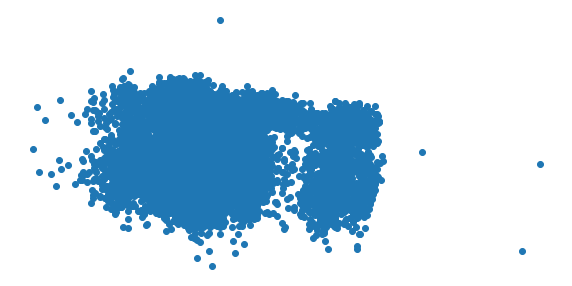

In [45]:
# Plot visual
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In the above visualization, PCA seems to indicate two classes, but it is still very unclear.

### t-SNE 

Number of iteration: 250
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.082s...
[t-SNE] Computed neighbors for 20000 samples in 19.213s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

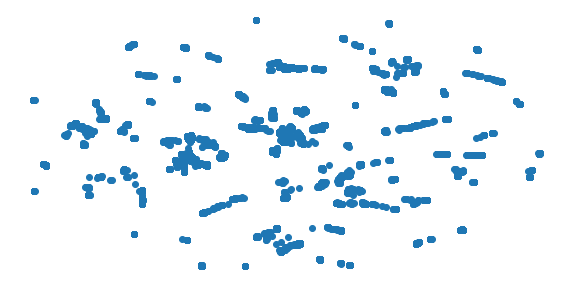

Number of iteration: 300
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.077s...
[t-SNE] Computed neighbors for 20000 samples in 17.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

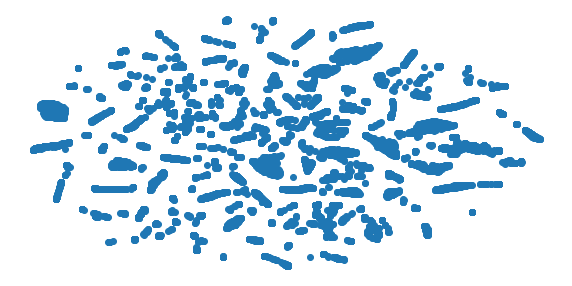

Number of iteration: 350
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.078s...
[t-SNE] Computed neighbors for 20000 samples in 17.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

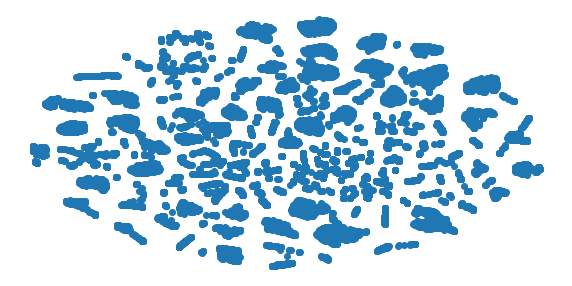

Number of iteration: 400
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.077s...
[t-SNE] Computed neighbors for 20000 samples in 18.737s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

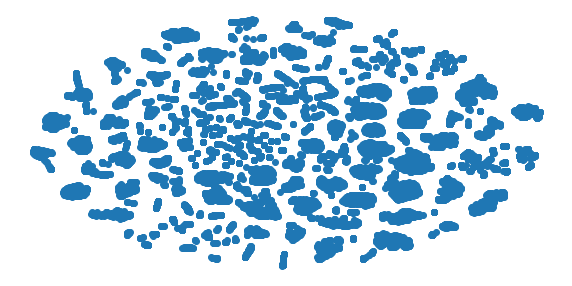

In [52]:
iterations = [250, 300, 350, 400]

for iteration in iterations:
    
    # Number of iterations
    print('Number of iteration: {}'.format(str(iteration)))

    # Define t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=iteration)

    # Retrieve components
    tsne_results = tsne.fit_transform(X_std)
    
    # Plot visual
    plt.figure(figsize=(10,5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

I think 350 and 400 iterations produce the best data visualizations. In helping determine the best perplexity below, I am going to use 400 iterations.

Number of perplexity: 40
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.079s...
[t-SNE] Computed neighbors for 20000 samples in 19.436s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

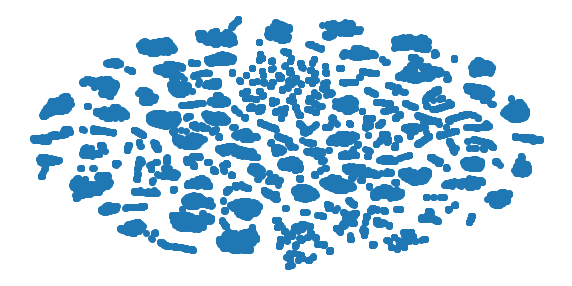

Number of perplexity: 50
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.078s...
[t-SNE] Computed neighbors for 20000 samples in 20.340s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

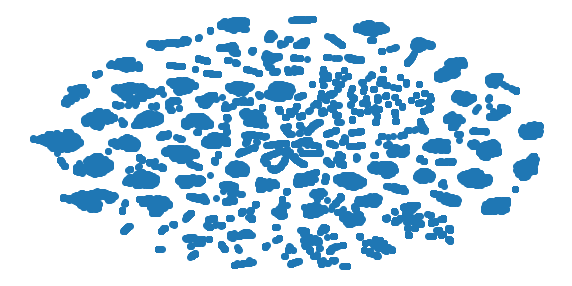

Number of perplexity: 60
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.075s...
[t-SNE] Computed neighbors for 20000 samples in 21.090s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

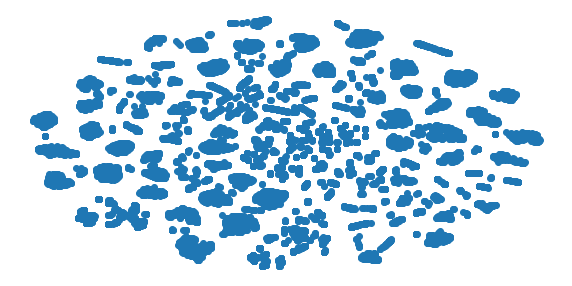

Number of perplexity: 70
[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.077s...
[t-SNE] Computed neighbors for 20000 samples in 21.358s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

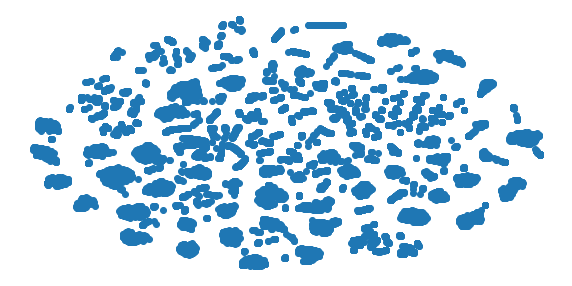

Number of perplexity: 80
[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.097s...
[t-SNE] Computed neighbors for 20000 samples in 24.375s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed condit

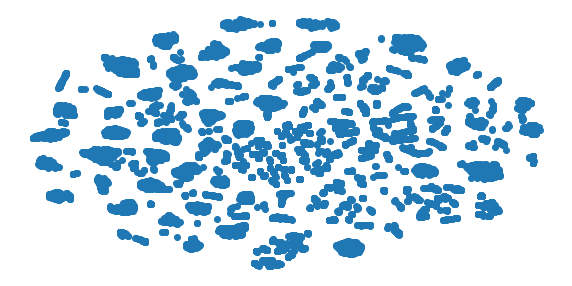

In [55]:
perplexities = [40, 50, 60, 70, 80]

for perplexity in perplexities:
    
    # Number of perplexity
    print('Number of perplexity: {}'.format(str(perplexity)))

    # Define t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=400)

    # Retrieve components
    tsne_results = tsne.fit_transform(X_std)
    
    # Plot visual
    plt.figure(figsize=(10,5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

While reviewing the different perplexities, I think they all produce very similar data visualizations. However, I think the combination of 40 for perplexity and 400 for iterations produces the best result.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.079s...
[t-SNE] Computed neighbors for 20000 samples in 21.992s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for s

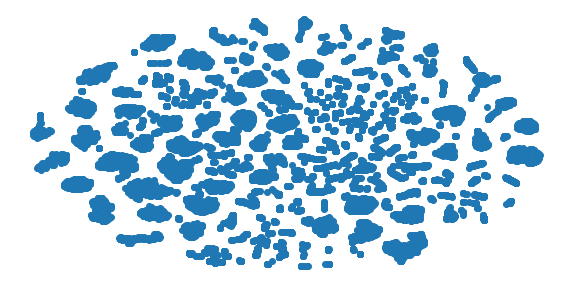

In [56]:
# Define t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=400)

# Retrieve components
tsne_results = tsne.fit_transform(X_std)
    
# Plot visual
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### UMAP 

Number of neighbors: 3


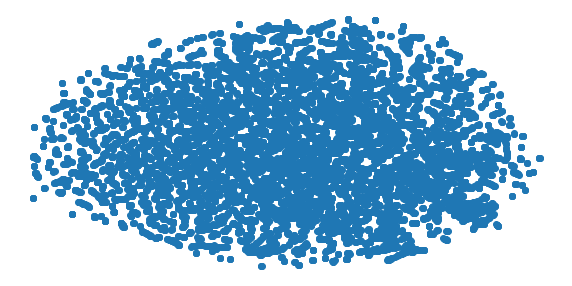

Number of neighbors: 4


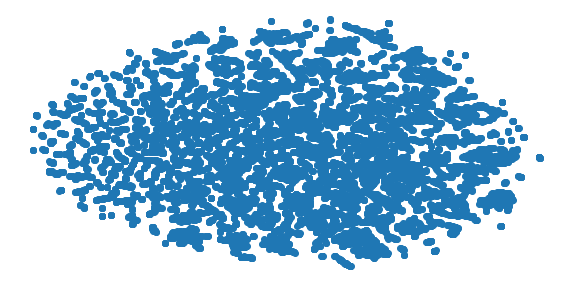

Number of neighbors: 5


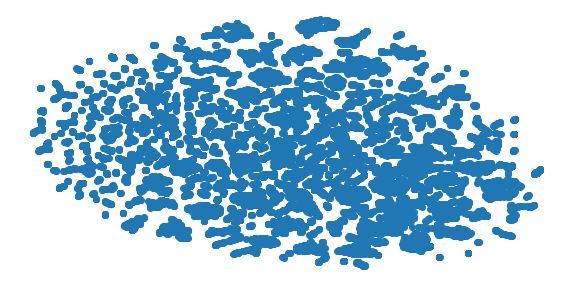

Number of neighbors: 6


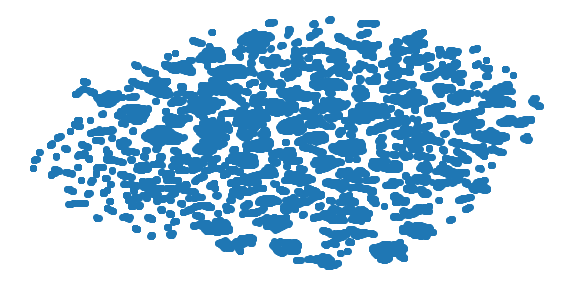

Number of neighbors: 7


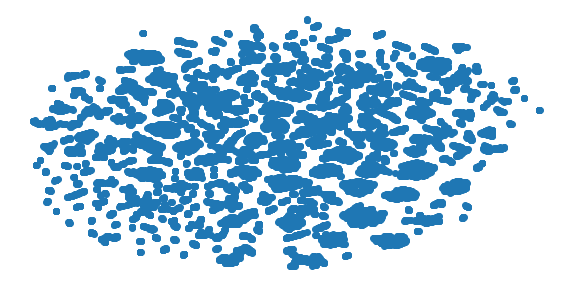

Number of neighbors: 8


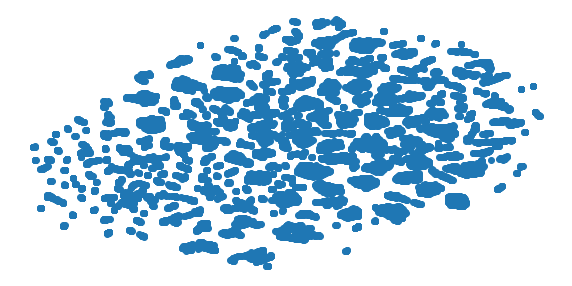

Number of neighbors: 9


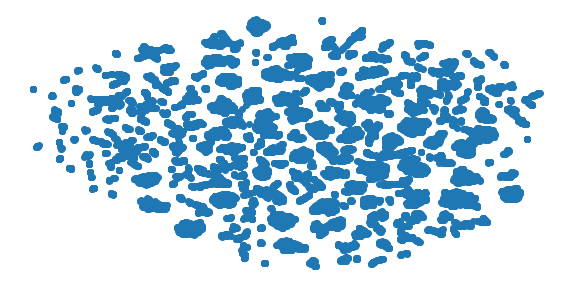

Number of neighbors: 10


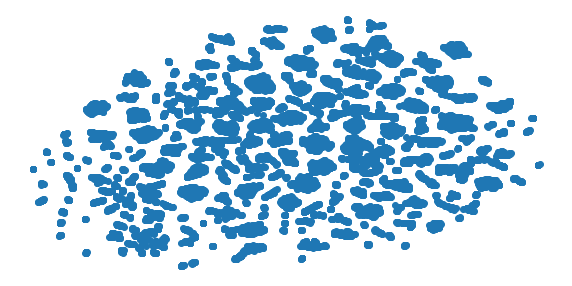

In [54]:
neighbors = [3, 4, 5, 6, 7, 8, 9, 10]

for neighbor in neighbors:
    
    # Number of neighbors
    print('Number of neighbors: {}'.format(str(neighbor)))

    # Define UMAP
    umap_results = umap.UMAP(n_neighbors=neighbor,
                             min_dist=0.3,
                             metric='correlation').fit_transform(X_std)
    
    # Plot visual
    plt.figure(figsize=(10,5))
    plt.scatter(umap_results[:, 0], umap_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

As for UMAP, I think using 10 for n_neighbors produces the best data visualization.

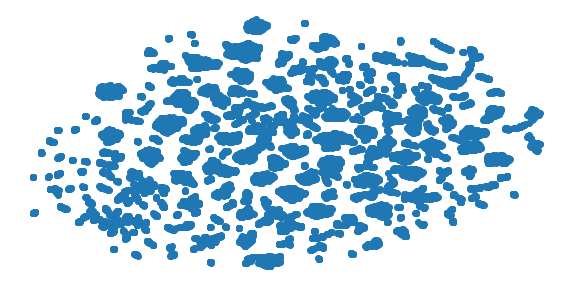

In [57]:
# Define UMAP
umap_results = umap.UMAP(n_neighbors=10,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X_std)
    
# Plot visual
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Conclusion 

When comparing K-Means, Hierarchical, DBSCAN and GMM clustering algorithms, I think DBSCAN produces the best result overall for Adjusted Rand Index and Silhouette score.

When comparing PCA, t-SNE and UMAP dimensionality reduction techniques, I think UMAP (n_neighbors=10) produces the best data visualization for the diamonds dataset.